In [5]:
import pandas as pd

data = {
    "Company" : ["Amazon", "Facebook", "Google"," Apple"],
    "Radio" : [37.8, 39.3, 45.9, 41.3],
    "Sales" : [22.1, 10.4, 18.3, 18.5]}
df = pd.DataFrame(data)
print(df)

    Company Radio  Sales
0    Amazon  37.8   22.1
1  Facebook  39.3   10.4
2    Google  45.9   18.3
3     Apple  41.3   18.5


In [7]:
df.head

<bound method NDFrame.head of     Company Radio  Sales
0    Amazon  37.8   22.1
1  Facebook  39.3   10.4
2    Google  45.9   18.3
3     Apple  41.3   18.5>

In [8]:
df.shape

(4, 3)

In [10]:
df.size

12

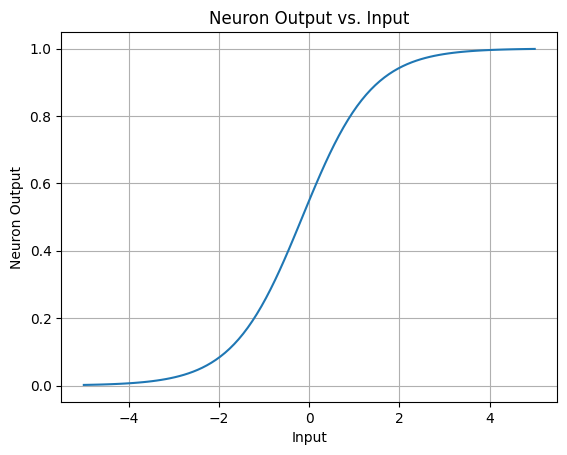

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input features, weights, and bias
x_values = np.linspace(-5, 5, 100).reshape(-1, 1)  
w = np.array([0.5, 0.8])  
b = 0.2  

outputs = 1 / (1 + np.exp(-(np.sum(x_values * w, axis=1) + b)))

# Plot the output
plt.plot(x_values, outputs)
plt.title('Neuron Output vs. Input')
plt.xlabel('Input')
plt.ylabel('Neuron Output')
plt.grid(True)
plt.show()

In [31]:
import numpy as np

def predict_sales(radio_values, weight, bias):
    return weight * np.array(radio_values) + bias

data = {
    "Company": ["Amazon", "Facebook", "Google", "Apple"],
    "Radio": [37.8, 39.3, 45.9, 41.3],
    "Sales": [22.1, 10.4, 18.3, 18.5]
}

weight_value = 0.5  
bias_value = 0.2    

predicted_sales = predict_sales(data["Radio"], weight_value, bias_value)

for company, radio, predicted_sale in zip(data["Company"], data["Radio"], predicted_sales):
    print(f"Company: {company}, Radio: {radio}, Predicted Sales: {predicted_sale}")

Company: Amazon, Radio: 37.8, Predicted Sales: 19.099999999999998
Company: Facebook, Radio: 39.3, Predicted Sales: 19.849999999999998
Company: Google, Radio: 45.9, Predicted Sales: 23.15
Company: Apple, Radio: 41.3, Predicted Sales: 20.849999999999998


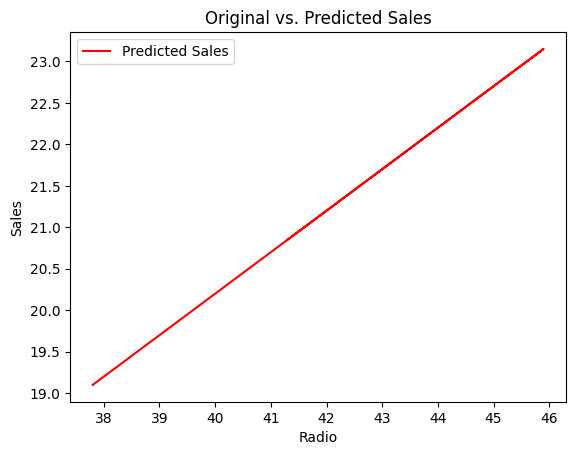

In [32]:
plt.plot(data["Radio"], predicted_sales, label="Predicted Sales", color="red")

plt.title('Original vs. Predicted Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [35]:
weight_value = 0.5  
bias_value = 0.2   

cost = cost_function(data["Radio"], data["Sales"], weight_value, bias_value)
print(f"Cost: {cost}") 

Cost: 31.83687499999999


In [37]:
def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight, bias = update_weights(radio, sales, weight, bias, learning_rate)

        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)

        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))

    return weight, bias, cost_history

In [39]:
initial_weight = 0.1
initial_bias = 0.01
learning_rate = 0.01
iterations = 31
final_weight, final_bias, cost_history = train(data["Radio"], data["Sales"], initial_weight, initial_bias, learning_rate, iterations)

iter=0    weight=10.94    bias=0.2742    cost=1.9e+05
iter=10    weight=15865460189768614.00    bias=384139232689922.5000    cost=4.3e+35
iter=20    weight=23926566556388102276820236238848.00    bias=579317133442022722521245155328.0000    cost=9.7e+65
iter=30    weight=36083453006074979600666234634201431262938267648.00    bias=873663277633465815736298230951171174319521792.0000    cost=2.2e+96


iter=0    weight=10.94    bias=0.2742    cost=187995.38
iter=10    weight=15865460189768614.00    bias=384139232689922.5000    cost=427520927759059141547261975756537856.00
iter=20    weight=23926566556388102276820236238848.00    bias=579317133442022722521245155328.0000    cost=972328008226062140359918679016398282526430594738678478497453703168.00
iter=30    weight=36083453006074979600666234634201431262938267648.00    bias=873663277633465815736298230951171174319521792.0000    cost=2211404621842693840626692084772292213992611888760760164574145225093496531336410228061492188545024.00


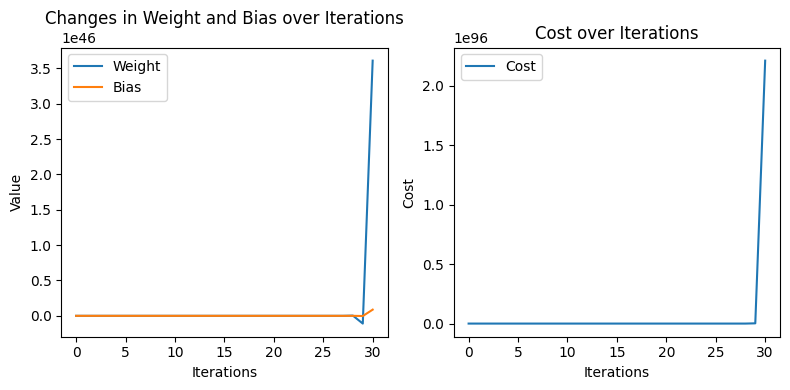

In [57]:
import matplotlib.pyplot as plt
import os

def train_and_visualize(radio, sales, initial_weight, initial_bias, learning_rate, iterations, save_dir="images"):
    weight = initial_weight
    bias = initial_bias
    cost_history = []
    weight_history = []  
    bias_history = []  

    for i in range(iterations):
        weight, bias = update_weights(radio, sales, weight, bias, learning_rate)

        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)
        weight_history.append(weight)
        bias_history.append(bias)

        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2f}".format(i, weight, bias, cost))

    os.makedirs(save_dir, exist_ok=True)

    plt.figure(figsize=(8,4))

    plt.subplot(1, 2, 1)
    plt.plot(range(iterations), weight_history, label='Weight')
    plt.plot(range(iterations), bias_history, label='Bias')
    plt.xlabel('Iterations')
    plt.ylabel('Value')
    plt.title('Changes in Weight and Bias over Iterations')
    plt.legend()
    plt.savefig(os.path.join(save_dir, f'linear_regression_line_weights_bias.png'))

    plt.subplot(1, 2, 2)
    plt.plot(range(iterations), cost_history, label='Cost')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over Iterations')
    plt.legend()
    plt.savefig(os.path.join(save_dir, f'linear_regression_line_cost.png'))

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'linear_regression_line_combined.png'))

initial_weight = 0.1
initial_bias = 0.01
learning_rate = 0.01
iterations = 31

train_and_visualize(data["Radio"], data["Sales"], initial_weight, initial_bias, learning_rate, iterations)